In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
# Importing the required libraries
import numpy as np     # Library for working with arrays and mathematical functions.
import matplotlib.pyplot as plt  # Library for generating plots and visualizing data.
from utils import temana as tm  # 'temana' module, for working with interpolation or spline functions.

### Signals with Variable Amplitude and Frequency
In this section, we will generate a set of signals with variable amplitude and frequency.
These signals will be grouped into a dataset that will serve as input for training and evaluating neural network architectures for signal reconstruction.


In [3]:
# In this section, we generate the simulation domain for our project.  

# `x`: This array represents the main simulation domain, with 5000 points evenly spaced between 0 and \(4\pi\).  
# `xm`: This array represents a reduced version of the simulation domain, with 1000 points evenly spaced between 0 and \(4\pi\).  

# Generate the full simulation domain with 5000 points
x = np.linspace(0, 4 * np.pi, 5000)

# Generate a reduced simulation domain with 250 points
xm = np.linspace(0, 4 * np.pi, 1000)

In [4]:
# Generate a dataset of signals with added noise
signal_list = []    # List to store the generated signals
sample_list = []    # List to store the corresponding signal samples
noise_list = []     # List to store the generated noise values

# Loop to generate multiple signals with noise
for i in range(300):  
    # Perform 300 iterations to generate a dataset of signals
    y, ym, noise = tm.generate_signal_with_nu_high_frequency(x, xm)  

    # Append the generated values to their respective lists
    signal_list.append(y)       # Append the generated signal to 'signal_list'
    sample_list.append(ym)      # Append the generated sample to 'sample_list'
    noise_list.append(noise)    # Append the generated noise to 'noise_list'

In [5]:
# Save the generated signals to text files

np.savetxt('../results/samples/samplesAV_FV/SignalAVFV_Super_Sample250_5000Val.txt', signal_list)
# Saves the list 'signal_list' to a text file named 'SignalAVFV_Super_Sample250_5000Val.txt'.
# The 'np.savetxt' function writes the data in text format to the specified path.
# Each line in the file will contain one of the generated signals.

np.savetxt('../results/samples/samplesAV_FV/SignalAVFV_Sub_Sample250_5000Val.txt', sample_list)
# Saves the list 'sample_list' to a text file named 'SignalAVFV_Sub_Sample250_5000Val.txt'.
# The 'np.savetxt

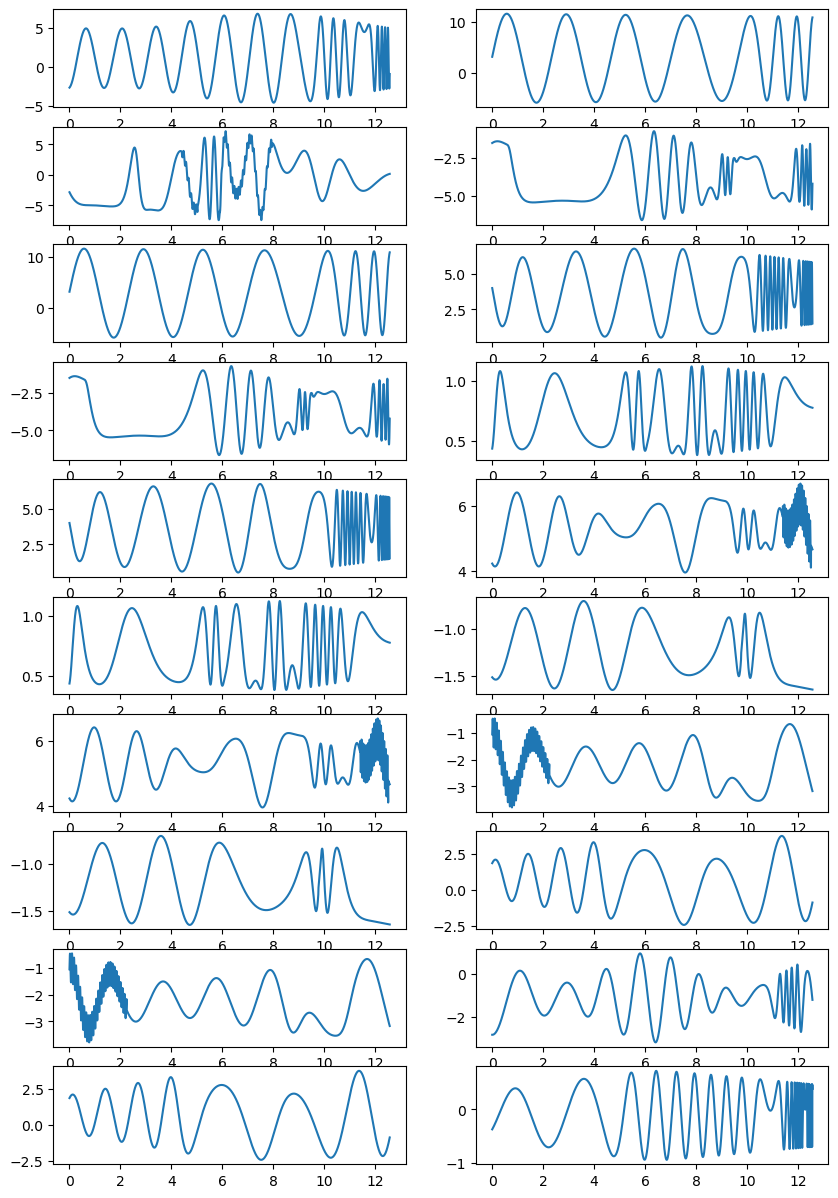

In [6]:
# Set up the figure and axes for signal visualization
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10, 15))  
# Creates a figure with a grid of subplots: 10 rows and 2 columns.
# The 'figsize' parameter adjusts the size of the figure to make the plots more readable.

a = 138  # Initial index to select which signals to plot

# Nested loop to iterate through columns and rows of the grid
for j in range(2):  # Iterate over the two columns
    for i in range(10):  # Iterate over the ten rows
        ax[i, j].plot(x, signal_list[a + 2*j + i])  
        # Plot the signal on the corresponding subplot (row i, column j)
        # The signal index is calculated as 'a + 2*j + i' to select a specific signal from the 'signal' list
        
        # ax[i, j].plot(xm, muestra[a + 2*j + i], color='red')  # Uncomment to plot the corresponding samples
        # This commented line plots the samples in red on the same graph for comparison with the signal.
        # Uncommenting this will allow you to compare the signal and the sample in the same plot.

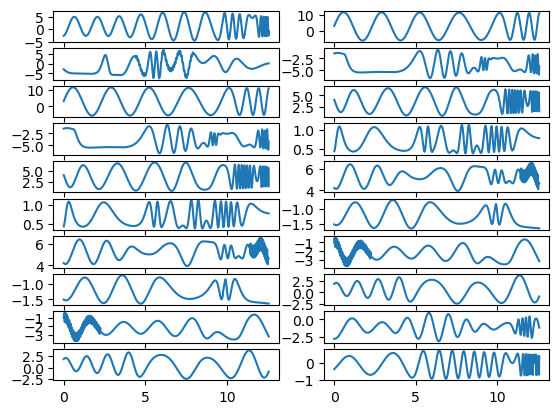

In [7]:
# Set up the figure and axes for sample visualization
fig, ax = plt.subplots(nrows=10, ncols=2)  
# Creates a figure with a grid of subplots: 10 rows and 2 columns.
# Each cell in the grid will be used to plot a different sample.

a = 138  # Initial index to select which samples to plot

# Nested loop to iterate through columns and rows of the grid
for j in range(2):  # Iterate over the two columns
    for i in range(10):  # Iterate over the ten rows
        ax[i, j].plot(xm, sample_list[a + 2*j + i])  
        # Plot the sample on the corresponding subplot (row i, column j)
        # The sample index is calculated as 'a + 2*j + i' to select a specific sample from the 'muestra' list

        # ax[i, j].plot(xm, muestra[a + 2*j + i], color='red')  # Uncomment to plot the same sample in red
        # This commented line would allow plotting the same sample in red.
        # If uncommented, this could be useful to highlight the curve on the same graph.

### Generation of Data with Different Sampling Rates
In this section, we will generate sets of signals with different sampling rates. We will use the pre-programmed functions, but in this case, we will store each signal at different sampling rates, specifically for the rates [150, 250, 500, 1000].


In [8]:
# Generate the signal dataset with noise
signal_list = []        # List to store the generated signals
sample_list = []        # List to store the corresponding samples of the signals
noise_list = []         # List to store the generated noise values

# Loop to generate multiple signals with noise
for i in range(300):  
    # Perform 300 iterations to generate a set of signals
    y, ym, noise = tm.generate_signal_with_nu_high_frequency(x, xm)  
    # Calls the function 'generate_signal_with_nu_high_frequency' to generate a signal 'y',
    # a modified sample 'ym', and the associated noise from the inputs 'x' and 'xm'

    # Add the results to the corresponding lists
    signal_list.append(y)        # Add the generated signal to the 'signal_list'
    sample_list.append(ym)       # Add the generated sample to the 'sample_list'
    noise_list.append(noise)     # Add the generated noise to the 'noise_list'

In [9]:
# List of sampling rates (parameters) used for generating the samples
sampling_rates = ["150", "250", "500", "1000"]

# Save the complete dataset of generated signals to a text file
np.savetxt('../results/samples/samplesAV_FV/SignalAVFV_Super_Sample150_250_500_1000_5000Val.txt', signal_list)
# Saves the 'signal_list' to a text file.
# The file will contain all the generated signals, with each signal on a separate line.

# Save the generated sub-samples in separate files, one for each sampling rate
# The 'sample_list' is a list of lists with a structure of length 3
for i in range(4):  
    # Iterate over the four sampling rates to save the corresponding sub-samples for each one
    file_name = '../results/samples/samplesAV_FV/SignalAVFV_Sub_Sample' + sampling_rates[i] + '_5000Val.txt'
    # Creates the output file name for the current sampling rate, with the appropriate format

    np.savetxt(file_name, [sample_list[j][i] for j in range(len(sample_list))])
    # Saves the sub-samples corresponding to the current sampling rate to a text file
    # The list of sub-samples is constructed by selecting the 'i' element from each sublist in 'sample_list'
    # This ensures that only the samples corresponding to the 'i' sampling rate are saved in the file
